<a href="https://colab.research.google.com/github/salmakhale/DL-computer-vision/blob/main/Training_NTI_Session_4_3_(Flowers_using_Resnet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# بسم الله الرحمن الرحيم

## Libs

In [ ]:
!pip install opendatasets

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Conv2D, MaxPooling2D, Flatten, PReLU, Conv1D, MaxPooling1D, ReLU, BatchNormalization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import opendatasets as od
import os
import cv2
import random as rn
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from tensorflow.keras.applications import ResNet50


## Data Load

In [ ]:
od.download('https://www.kaggle.com/datasets/alxmamaev/flowers-recognition')

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition


100%|██████████| 225M/225M [00:11<00:00, 20.5MB/s]


In [ ]:
image_size = 224
batch_size = 10

In [ ]:
generator = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range = 0.4,
                                   height_shift_range = 0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   validation_split=0.2)

In [ ]:
train_generator = generator.flow_from_directory(
        '/content/flowers-recognition/flowers',
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')
test_generator = generator.flow_from_directory(
        '/content/flowers-recognition/flowers',
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


## Model

In [ ]:
early_stoping_callback = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=10,
    restore_best_weights=True
)

In [ ]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(256))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

model.layers[0].trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_6 (PReLU)                    │ (None, 1024)                │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_7 (PReLU)                    │ (None, 256)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,964,165 (99.05 MB)

 Trainable params: 2,369,797 (9.04 MB)

 Non-trainable params: 23,594,368 (90.01 MB)

In [ ]:
history = model.fit(train_generator,
        batch_size=512,
        epochs=20,
        validation_data=test_generator,
        callbacks=[early_stoping_callback])

Epoch 1/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 65s 184ms/step - accuracy: 0.8899 - loss: 0.3233 - val_accuracy: 0.8151 - val_loss: 0.5229
Epoch 2/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 64s 183ms/step - accuracy: 0.9004 - loss: 0.2945 - val_accuracy: 0.8233 - val_loss: 0.5212
Epoch 3/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9050 - loss: 0.2675

## evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9644 - loss: 0.1117
Test Loss: 0.1228
Test Accuracy: 0.9643


In [ ]:
pred = pd.DataFrame(model.predict(X_test)).idxmax(axis=1).values

685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
y_test = pd.DataFrame(y_test).idxmax(axis=1).values

In [ ]:
print(classification_report(y_test, pred, target_names= ['N', 'S', 'V', 'F', 'Q']))

              precision    recall  f1-score   support

           N       1.00      0.97      0.98     18118
           S       0.58      0.88      0.70       556
           V       0.90      0.95      0.92      1448
           F       0.48      0.93      0.63       162
           Q       0.97      0.99      0.98      1608

    accuracy                           0.96     21892
   macro avg       0.79      0.94      0.84     21892
weighted avg       0.97      0.96      0.97     21892



In [ ]:
conf = confusion_matrix(y_test, pred)

<Axes: >

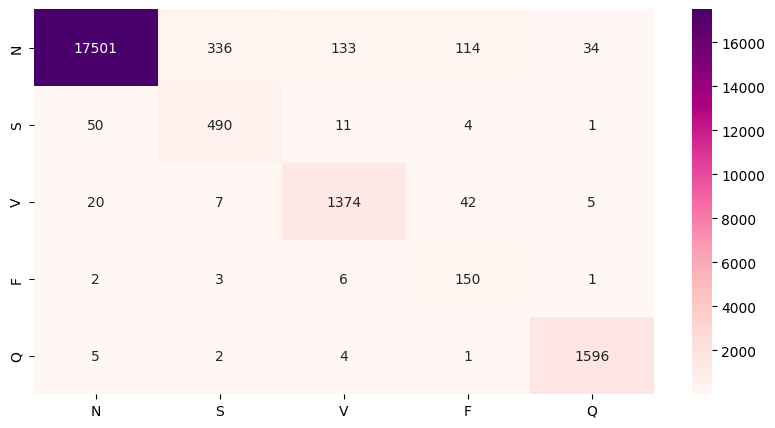

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(conf, annot=True, fmt='0.0f', cmap='RdPu', xticklabels=['N', 'S', 'V', 'F', 'Q'], yticklabels=['N', 'S', 'V', 'F', 'Q'])

<Axes: >

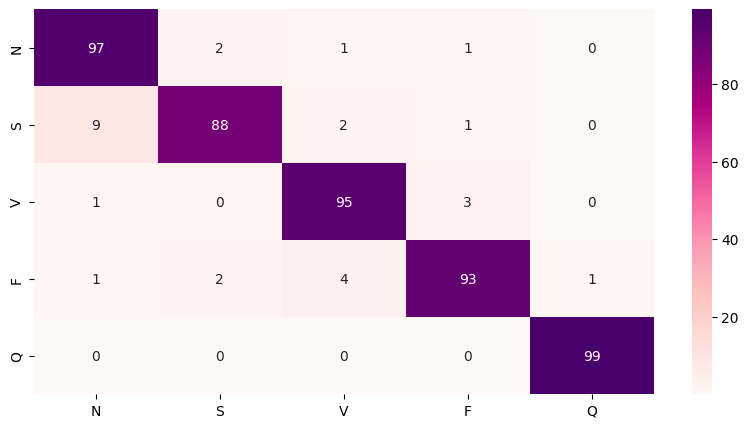

In [ ]:
cm_percentage = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis] * 100
plt.figure(figsize=(10, 5))
sns.heatmap(cm_percentage, annot=True, fmt='0.0f', cmap='RdPu', xticklabels=['N', 'S', 'V', 'F', 'Q'], yticklabels=['N', 'S', 'V', 'F', 'Q'])